In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.utils import *
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

Using TensorFlow backend.


['train.csv', 'sample_submission.csv', 'test.csv']


In [2]:
data_train = pd.read_csv('../input/train.csv')
data_test = pd.read_csv('../input/test.csv')
Y_train = data_train['label'].values

In [3]:
X_train = data_train.loc[:,'pixel0':'pixel783'].values
X_train = np.array(X_train)
X_train = X_train.reshape([-1,28,28,1])
Y_train = Y_train.reshape([-1,1])
print(X_train.shape)
print(Y_train.shape)

(42000, 28, 28, 1)
(42000, 1)


In [4]:
X_test = data_test.loc[:,'pixel0':'pixel783'].values
X_test = np.array(X_test)
X_test = X_test.reshape([-1,28,28,1])
print(X_test.shape)

(28000, 28, 28, 1)


In [5]:
X_train = X_train/255
X_test = X_test/255
random_seed = 2
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state = random_seed)

In [6]:
Y_train = to_categorical(Y_train)
Y_val = to_categorical(Y_val)
print(Y_train.shape)

(37800, 10)


In [7]:
inputs = Input(shape = (28,28,1))
conv1 = Conv2D(16, 3, activation = 'tanh', padding = 'same')(inputs)
pool1 = MaxPooling2D(pool_size = (2,2))(conv1)
conv2 = Conv2D(32, 3, activation = 'tanh', padding = 'same')(pool1)
pool2 = MaxPooling2D(pool_size = (2,2))(conv2)
conv3 = Conv2D(64, 3, activation = 'tanh', padding = 'same')(pool2)
drop3 = Dropout(0.2)(conv3)
conv4 = Conv2D(128, 3, activation = 'tanh', padding = 'same')(drop3)
flat = Flatten()(conv4)
dense1 = Dense(256, activation = 'tanh', kernel_regularizer=regularizers.l2(0.01))(flat)
drop_fc1 = Dropout(0.5)(dense1)
outputs = Dense(10, activation = 'softmax')(drop_fc1)
model = Model(input = inputs, output = outputs)
print(model.summary())
plot_model(model, to_file = 'model.png')

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  del sys.path[0]


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 64)          0         
__________

In [8]:
model.compile(Adam(lr = 10e-4), loss = "categorical_crossentropy", metrics = ["accuracy"])
history = model.fit(x = X_train, y = Y_train, epochs = 100, batch_size = 6000, validation_data = (X_val, Y_val), verbose = 1 )

Train on 37800 samples, validate on 4200 samples
Epoch 1/100
37800/37800 [==============================] - 7s 192us/step - loss: 5.7813 - acc: 0.5688 - val_loss: 3.7628 - val_acc: 0.8214
Epoch 2/100
37800/37800 [==============================] - 2s 53us/step - loss: 3.1223 - acc: 0.8354 - val_loss: 2.1076 - val_acc: 0.8850
Epoch 3/100
37800/37800 [==============================] - 2s 53us/step - loss: 1.7292 - acc: 0.8783 - val_loss: 1.1105 - val_acc: 0.9081
Epoch 4/100
37800/37800 [==============================] - 2s 53us/step - loss: 0.9453 - acc: 0.8993 - val_loss: 0.6349 - val_acc: 0.9183
Epoch 5/100
37800/37800 [==============================] - 2s 53us/step - loss: 0.5707 - acc: 0.9145 - val_loss: 0.4147 - val_acc: 0.9381
Epoch 6/100
37800/37800 [==============================] - 2s 53us/step - loss: 0.4024 - acc: 0.9289 - val_loss: 0.3245 - val_acc: 0.9405
Epoch 7/100
37800/37800 [==============================] - 2s 53us/step - loss: 0.3190 - acc: 0.9384 - val_loss: 0.2657 - 

37800/37800 [==============================] - 2s 53us/step - loss: 0.0988 - acc: 0.9811 - val_loss: 0.1017 - val_acc: 0.9805
Epoch 60/100
37800/37800 [==============================] - 2s 53us/step - loss: 0.1016 - acc: 0.9811 - val_loss: 0.1061 - val_acc: 0.9781
Epoch 61/100
37800/37800 [==============================] - 2s 53us/step - loss: 0.0997 - acc: 0.9814 - val_loss: 0.1012 - val_acc: 0.9817
Epoch 62/100
37800/37800 [==============================] - 2s 53us/step - loss: 0.1011 - acc: 0.9814 - val_loss: 0.0978 - val_acc: 0.9829
Epoch 63/100
37800/37800 [==============================] - 2s 53us/step - loss: 0.0995 - acc: 0.9812 - val_loss: 0.0900 - val_acc: 0.9857
Epoch 64/100
37800/37800 [==============================] - 2s 53us/step - loss: 0.0954 - acc: 0.9824 - val_loss: 0.0957 - val_acc: 0.9821
Epoch 65/100
37800/37800 [==============================] - 2s 53us/step - loss: 0.0972 - acc: 0.9812 - val_loss: 0.0992 - val_acc: 0.9829
Epoch 66/100
37800/37800 [==============

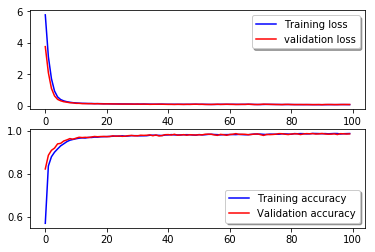

In [12]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [13]:
ans = model.predict(x = X_test, verbose = 1)

28000/28000 [==============================] - 3s 91us/step


In [14]:
ans = np.argmax(ans, axis =1)

In [15]:
print(ans)

[2 0 9 ... 3 9 2]


In [16]:
ans = pd.Series(ans, name = 'Label')
index = pd.Series(range(1,28001), name = 'ImageID')
submission = pd.concat([index, ans], axis = 1)

In [ ]:
submission.to_csv("cnn_mnist.csv",index=False)